# Data Analysis and Preprocessing

## Importing Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import src.data_anaysis as da

## Load Dataset

In [2]:
# Load the dataset
fraud_data_path = '../data/raw/Fraud_Data.csv'
ip_data_path = "../data/raw/IpAddress_to_Country.csv"
credit_data_path = "../data/raw/creditcard.csv"

fraud_data = da.load_data(fraud_data_path)
ip_data = da.load_data(ip_data_path)
credit_data = da.load_data(credit_data_path)

## Analyzing Fraud Data

In [3]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
da.check_data_quality(fraud_data)

=== Data Overview ===
Shape: (151112, 11)
=== Data Description ===
             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  
=== Data Types ===
user_id             int64
signup_time        object
purchase_time      object
purchas

In [5]:
fraud_data = da.convert_to_datetime(fraud_data, ['signup_time', 'purchase_time'])

fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


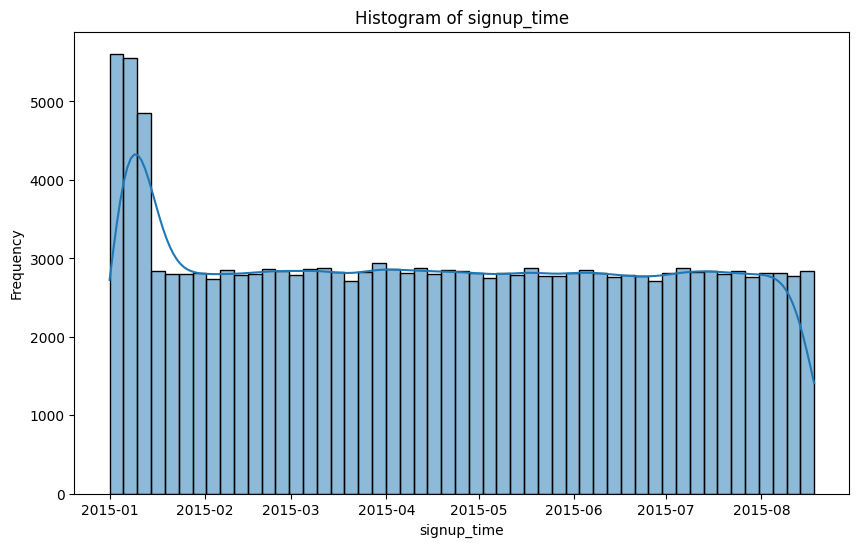

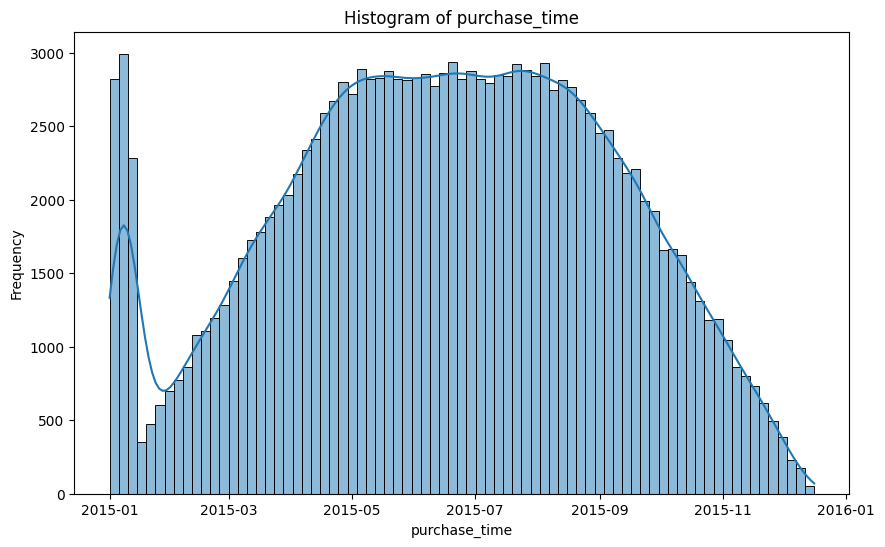

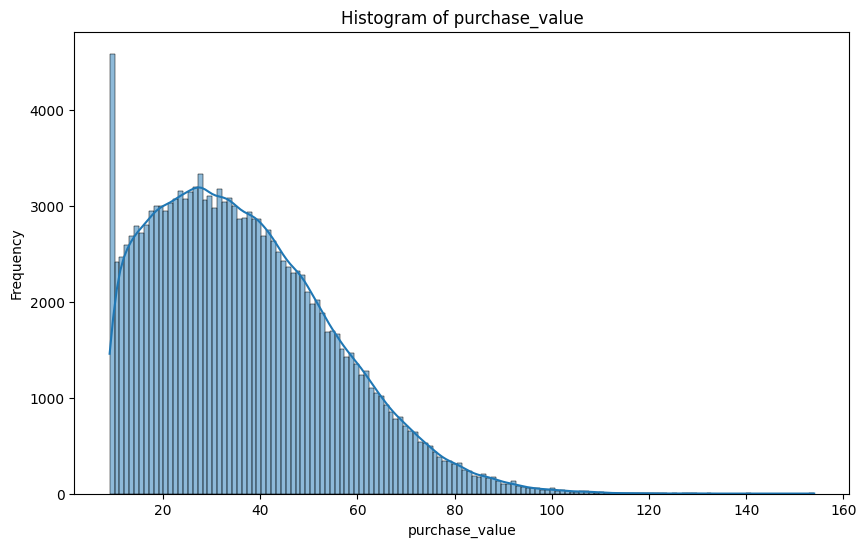

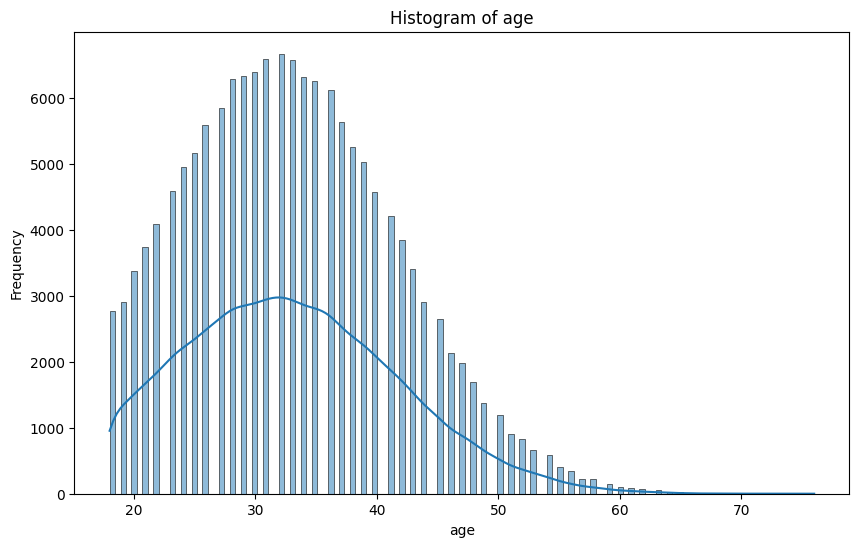

In [6]:
numeric_columns = ['signup_time', 'purchase_time', 'purchase_value', 'age']

for column in numeric_columns:
    da.plot_histogram(fraud_data, column, title=f"Histogram of {column}")

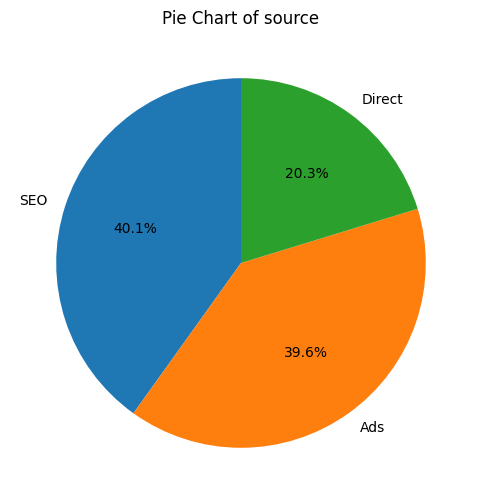

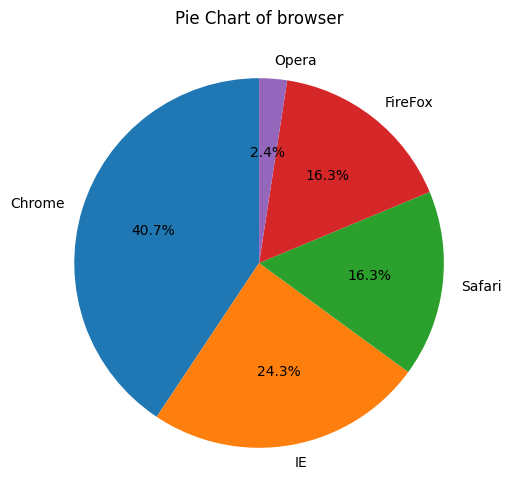

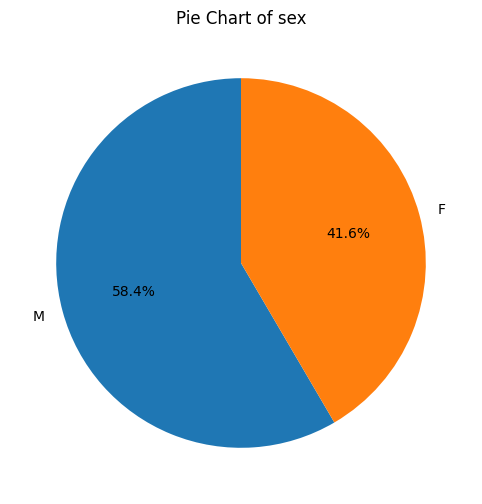

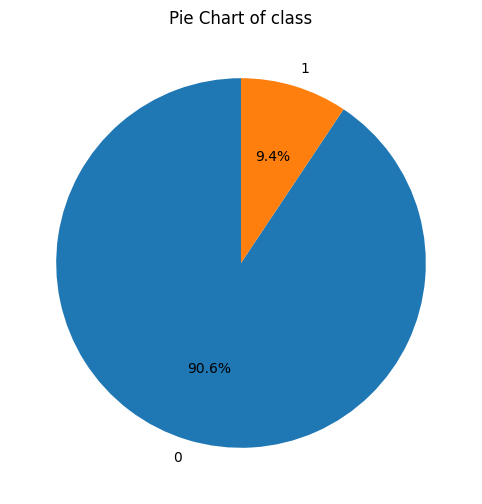

In [7]:
catagorical_columns = ['source', 'browser', 'sex', 'class']

# Plotting pie charts for categorical columns
for column in catagorical_columns:
    da.plot_pie_chart(fraud_data, column)

=== Analyzing Class Relationships ===

--- Analysis for purchase_value ---


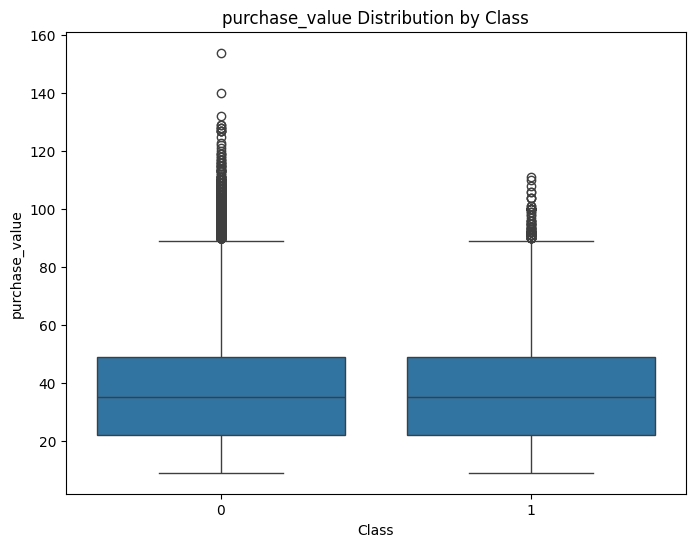


--- Analysis for age ---


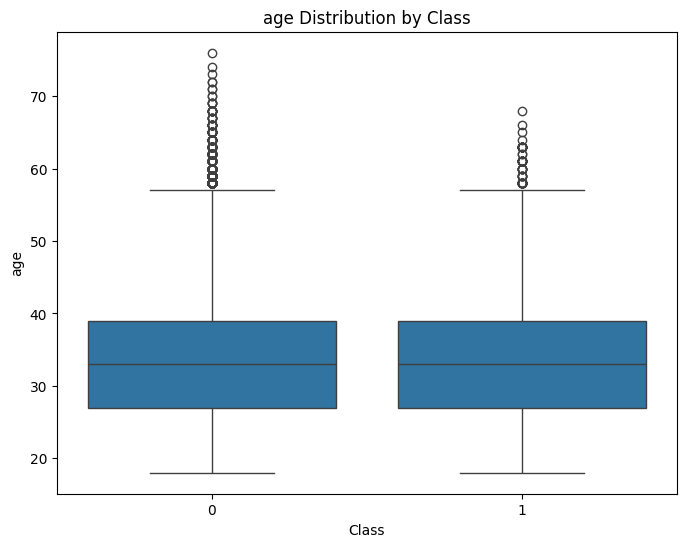


--- Analysis for source ---


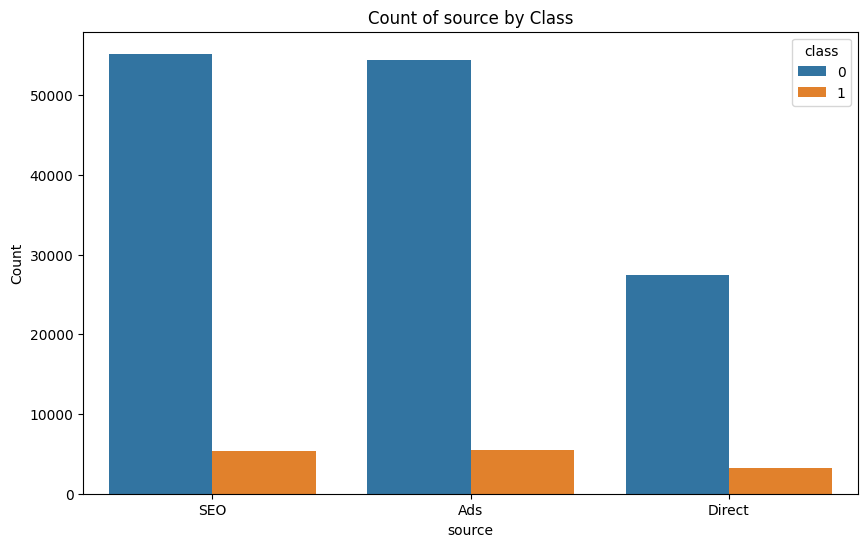


--- Analysis for browser ---


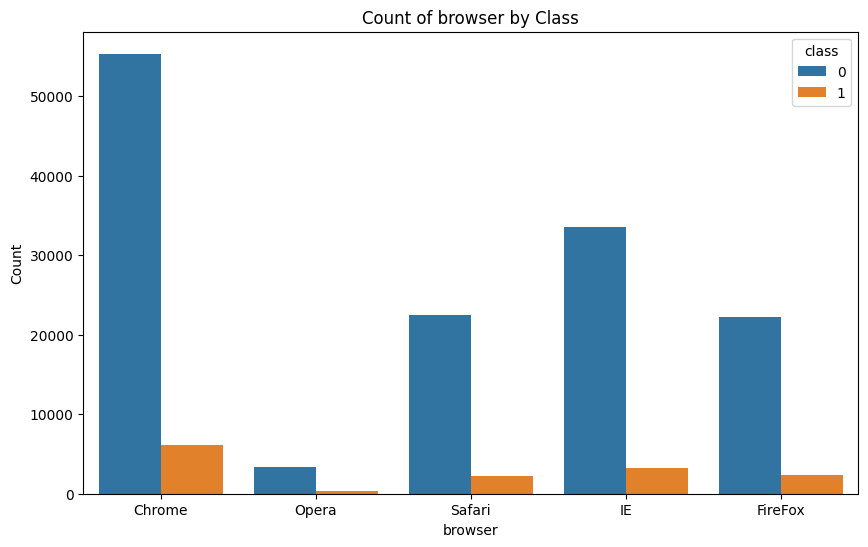


--- Analysis for sex ---


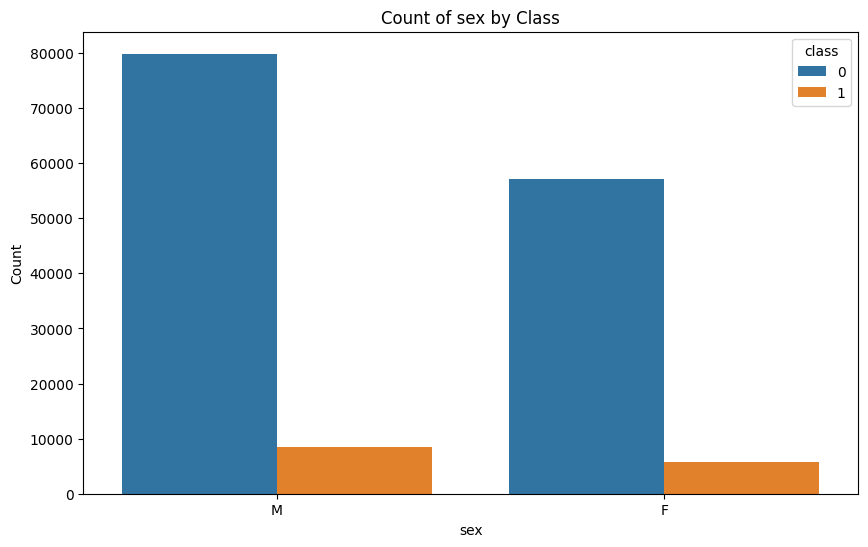

In [8]:
da.analyze_class_relationships(fraud_data)

## Analyzing IP Data

In [9]:
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [10]:
da.check_data_quality(ip_data)

=== Data Overview ===
Shape: (138846, 3)
=== Data Description ===
       lower_bound_ip_address  upper_bound_ip_address
count            1.388460e+05            1.388460e+05
mean             2.724532e+09            2.724557e+09
std              8.975215e+08            8.974979e+08
min              1.677722e+07            1.677747e+07
25%              1.919930e+09            1.920008e+09
50%              3.230887e+09            3.230888e+09
75%              3.350465e+09            3.350466e+09
max              3.758096e+09            3.758096e+09
=== Data Types ===
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

=== Missing Values ===
No missing values.

=== Duplicate Rows ===
No duplicate rows found.


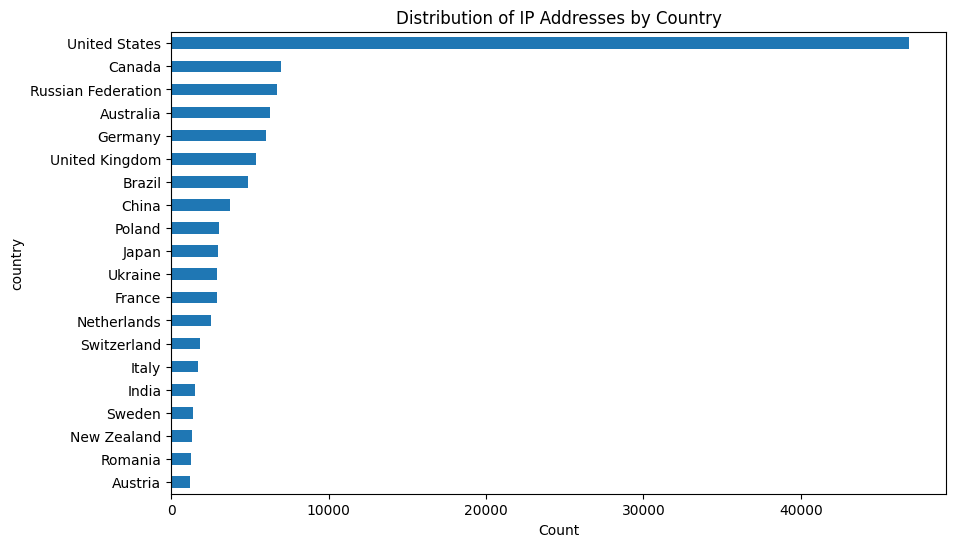

In [11]:
da.plot_bar_chart(ip_data, 'country', title='Distribution of IP Addresses by Country')

## Analyzing Credit Data

In [12]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
da.check_data_quality(credit_data)

=== Data Overview ===
Shape: (284807, 31)
=== Data Description ===
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149

In [14]:
# Remove duplicate rows
credit_data = credit_data.drop_duplicates()
print("\n=== DataFrame after removing duplicates ===")
da.check_data_quality(credit_data)


=== DataFrame after removing duplicates ===
=== Data Overview ===
Shape: (283726, 31)
=== Data Description ===
                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.

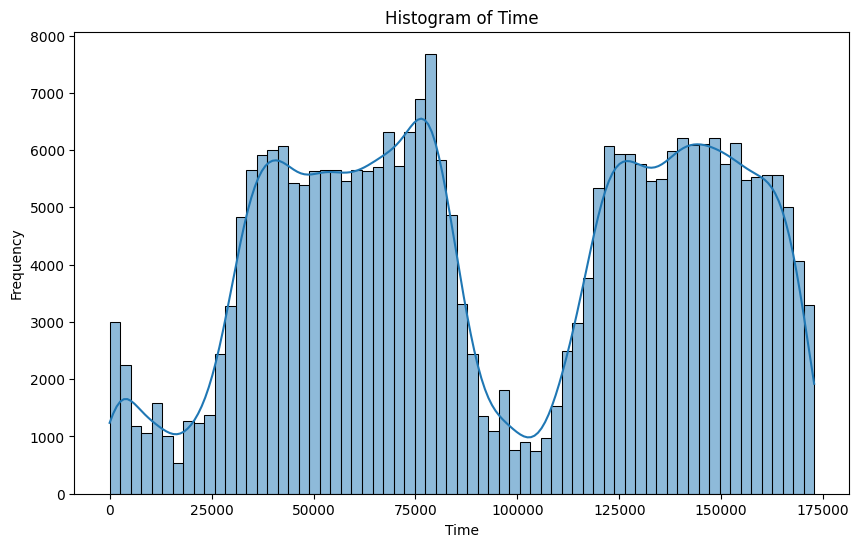

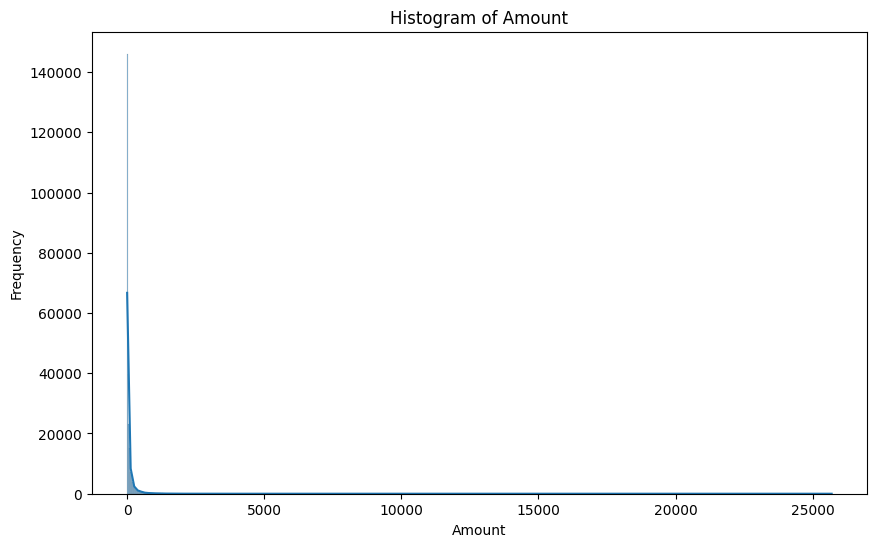

In [15]:
numeric_columns = ['Time', 'Amount']

for column in numeric_columns:
    da.plot_histogram(credit_data, column, title=f"Histogram of {column}")

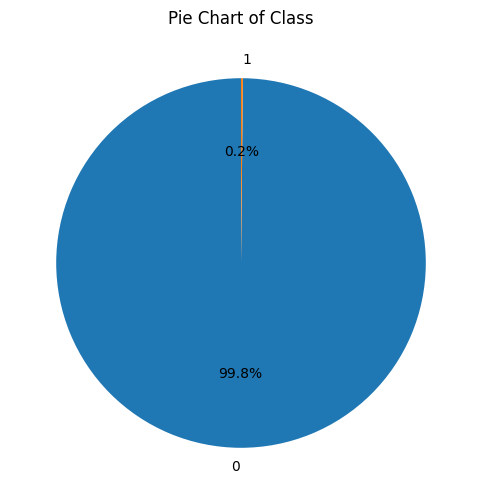

In [16]:
da.plot_pie_chart(credit_data, 'Class')

## Merge Datasets

In [17]:
# Convert ip_address to integer
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int)
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].astype(int)

In [18]:
# Sort ip_data by lower_bound
ip_data_sorted = ip_data.sort_values('lower_bound_ip_address')

# merge_asof to find nearest lower_bound less than or equal to IP
fraud_data_sorted = fraud_data.sort_values('ip_address')
merged_df = pd.merge_asof(
    fraud_data_sorted,
    ip_data_sorted,
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter IPs that fall within the actual range
merged_df['in_range']  = merged_df['ip_address'] <= merged_df['upper_bound_ip_address']

# Set the country to 'Unknown' if not in range
merged_df['country'] = merged_df.apply(
    lambda row: row['country'] if row['in_range'] else 'Unknown',
    axis=1
)

# Drop the temporary ip_address_int column and the IP range columns from ip_df
merged_df = merged_df.drop(columns=['in_range', 'lower_bound_ip_address', 'upper_bound_ip_address'])

merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,Unknown
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447,0,Unknown
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,Unknown
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,Unknown
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,Unknown


In [19]:
# Set the user_id as the index in the sorted df for easy lookup
merged_df_indexed = merged_df.set_index('user_id')

# Reindex sorted df rows according to the original df user_id order
fraud_data = merged_df_indexed.loc[fraud_data['user_id']].reset_index()
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


## Feature Engineering

In [20]:
# Frequency by device
device_freq = fraud_data.groupby('device_id').size().reset_index(name='device_transaction_frequency')

# Merge device frequency with fraud data
fraud_data = fraud_data.merge(device_freq, on='device_id', how='left')

In [21]:
# Extracting additional time features
fraud_data['transaction_date'] = pd.to_datetime(fraud_data['purchase_time']).dt.date
fraud_data['transaction_hour'] = pd.to_datetime(fraud_data['purchase_time']).dt.hour
fraud_data['transaction_weekday'] = pd.to_datetime(fraud_data['purchase_time']).dt.day_name()

In [22]:
fraud_data['time_since_signup'] = (fraud_data['purchase_time'] - fraud_data['signup_time'])
fraud_data['time_since_signup_seconds'] = fraud_data['time_since_signup'].dt.total_seconds()

In [23]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,device_transaction_frequency,transaction_date,transaction_hour,transaction_weekday,time_since_signup,time_since_signup_seconds
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,2015-04-18,2,Saturday,52 days 03:51:22,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,2015-06-08,1,Monday,0 days 04:59:04,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,2015-01-01,18,Thursday,0 days 00:00:01,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Unknown,1,2015-05-04,13,Monday,5 days 16:41:25,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,2015-09-09,18,Wednesday,50 days 11:31:01,4361461.0


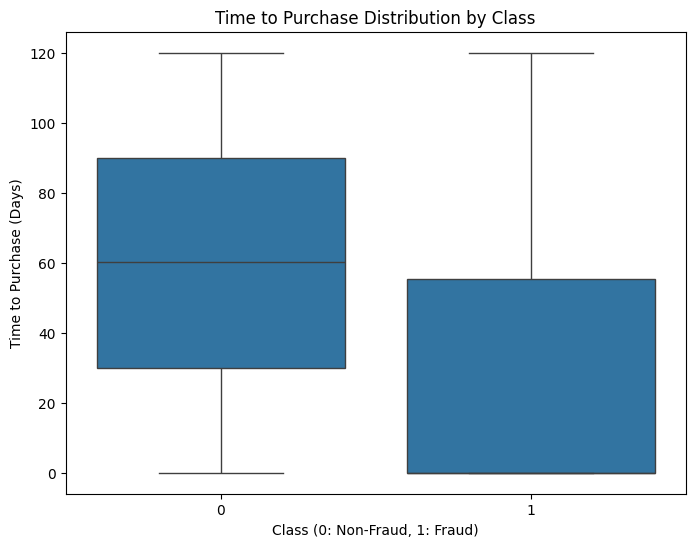

In [24]:
# Call the function with the fraud_df DataFrame
da.analyze_time_since_signup_class_relationship(fraud_data)
fraud_data = fraud_data.drop(columns=['time_since_signup'])

## Data Transformation

In [25]:
# unique count for categories in categorical columns
catagorical_columns = ['source', 'browser', 'device_id', 'sex', 'country', 'transaction_date', 'transaction_weekday']
for column in catagorical_columns:
    unique_count = fraud_data[column].nunique()
    print(f"Unique count for {column}: {unique_count}")

Unique count for source: 3
Unique count for browser: 5
Unique count for device_id: 137956
Unique count for sex: 2
Unique count for country: 182
Unique count for transaction_date: 350
Unique count for transaction_weekday: 7


In [26]:
# Handle Class Imbalance: Analyze the class distribution
print("Value counts of the 'class' column:")
print(fraud_data['class'].value_counts())

print("\nPercentage distribution of the 'class' column:")
print(fraud_data['class'].value_counts(normalize=True) * 100)

Value counts of the 'class' column:
class
0    136961
1     14151
Name: count, dtype: int64

Percentage distribution of the 'class' column:
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


In [27]:
## drop user id
fraud_data = fraud_data.drop(columns=['user_id'])

In [28]:
fraud_data['signup_time'] = fraud_data['signup_time'].astype('int64') // 10**9  # convert to seconds
fraud_data['purchase_time'] = fraud_data['purchase_time'].astype('int64') // 10**9

In [29]:
fraud_data = pd.get_dummies(fraud_data, columns=['source', 'browser', 'sex'])

In [30]:
le = LabelEncoder()
for col in ['device_id', 'country', 'transaction_date', 'transaction_weekday']:
    fraud_data[col] = le.fit_transform(fraud_data[col])

In [31]:
scaler = StandardScaler()
features_to_scale = [
    'signup_time',
    'purchase_time',
    'purchase_value',
    'age',
    'device_transaction_frequency',
    'transaction_date',
    'time_since_signup_seconds'
]
for col in features_to_scale:
    if col in fraud_data.columns:
        fraud_data[col] = scaler.fit_transform(fraud_data[[col]])

In [32]:
# save the processed data
fraud_data.to_csv('../data/processed/fraud_data_processed.csv', index=False)

In [33]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   signup_time                   151112 non-null  float64
 1   purchase_time                 151112 non-null  float64
 2   purchase_value                151112 non-null  float64
 3   device_id                     151112 non-null  int64  
 4   age                           151112 non-null  float64
 5   ip_address                    151112 non-null  int64  
 6   class                         151112 non-null  int64  
 7   country                       151112 non-null  int64  
 8   device_transaction_frequency  151112 non-null  float64
 9   transaction_date              151112 non-null  float64
 10  transaction_hour              151112 non-null  int32  
 11  transaction_weekday           151112 non-null  int64  
 12  time_since_signup_seconds     151112 non-nul

In [34]:
X = fraud_data.drop('class', axis=1)
y = fraud_data['class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check original class distribution
print("Original training set distribution:", Counter(y_train))

# --- 1. Apply SMOTE ---
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE distribution:", Counter(y_smote))

# --- 2. Apply SMOTETomek ---
smote_tomek = SMOTETomek(random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
print("After SMOTETomek distribution:", Counter(y_smote_tomek))


Original training set distribution: Counter({0: 95872, 1: 9906})
After SMOTE distribution: Counter({0: 95872, 1: 95872})
After SMOTETomek distribution: Counter({0: 85120, 1: 85120})
